In [2]:
# 必要なライブラリのimport
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# DataFrameですべての列を表示する設定
pd.options.display.max_columns = None

# seabornによる装飾を有効にする
sns.set_theme()

In [3]:
# Irisデータセットの読み込み
from sklearn.datasets import load_iris
iris = load_iris()

In [ ]:
#DataFrame型へ変換
# irisのfeature_namesは「sepal length(cm)」のように空白やカッコが付いていて扱いづらいので以下の列名を使用する
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# datasetの作成,アヤメの品種は「species」という列名で追加しています。
dataset = pd.DataFrame(data = iris['data'], columns = feature_names)
dataset['species'] = iris['target']
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


クラスタリングとは、データをグループに分ける手法です。まずはデータセットの petal_width と petal_length で散布図を作成

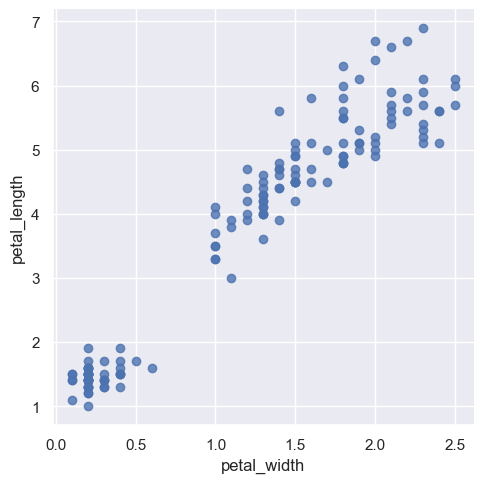

In [5]:
# petal_width と petal_length による散布図
sns.lmplot(x='petal_width', y='petal_length', data=dataset, fit_reg=False)

上の図を「3つ」に丸で囲ってグループ化
グループ化をプログラムで行う手法が クラスタリング です。1つ1つのグループのことを クラスタ 、グループの数のことを クラスタ数 と呼びます

クラスタリングの特徴
クラスタリングには以下のような特徴があります。

教師なし学習
前のレッスンで学んだ 教師あり学習 である分類モデルでは is_setosa や species といった 正解（＝目的変数） を用意して説明変数との対応を学習させ、分類を行いました。
それに対して 教師なし学習 であるクラスタリングでは正解を用意する必要がありません。クラスタリングではデータの特徴を使ってグループ化を行います。

グループを決める距離
グループ化の基準はデータ同士の 距離 です。クラスタリングは近いデータ同士をグループ化します。距離の考え方としては、私たちが長さを測るときに使う ユークリッド距離 が一般的です。
なお、データ同士の値の範囲に差がある場合、たとえば片方はメートル（m）で、もう片方はセンチメートル（cm）のような場合、距離の計算を適切には行えません。そのような場合には、Lesson5で紹介したデータの前処理で 正規化 を行ってからクラスタリングを実施します。

クラスタ数
クラスタ数（グループ数）は私たちで決める必要があります。適切なクラスタ数は、分析結果をどのように利用するかによります。
・人間の意思決定に利用する場合：
たとえば顧客をグループ化してマーケティングに活用することを想定した場合、各グループの特徴を人間が理解できないと意思決定が困難になります。データ量にもよりますが、多くても10ぐらいのクラスタ数が適切です
・コンピュータの意思決定に利用する場合：
顧客の購買履歴を分析して商品をすすめる レコメンドシステム などのように、クラスタリングの結果をコンピュータ（プログラム）が使用する場合、「売上UP」のような結果が出れば良く、グループの特徴は人間が理解できる必要ありません

クラスタリングの活用
クラスタリングは正解を用意しなくてもデータ分析を行うことができるため、幅広い分野で活用されています。

・ECサイトのレコメンド：AmazonなどのECサイトで商品を購入した際「こちらの商品はいかがですか？」とオススメ商品を紹介する仕組みを レコメンド と呼びます。レコメンドは顧客の購買履歴をもとに「未だ購入していないが購入しそうな商品」データを抽出します
・ニュースカテゴリーの自動生成：記事の中に含まれる単語の類似度でグループ化し、記事を大まかに分類します
・SNS：つながっているユーザーや投稿内容から利用者をグループ化し、投稿の表示制御などを行います。

k-means法のアルゴリズム
k-means法は以下のようなアルゴリズムです。

1.クラスタ数を決めます。その数をkとします
2.ランダムに位置を決めたk個の点を配置します。この点のことを シード と呼びます
3.各データを もっとも距離が近いシード に割り当てます
4.シードごとにグループ化された データの平均値 を求めます
5.求めたデータの平均値を新たなシードとします
6.No3～No5を繰り返し、シードの変動が無くなったら終了します

k-means法は簡単で高速なアルゴリズムですが以下の欠点があります。

シードの最初の位置の影響を受けやすい：シードの最初の位置はランダムで設定されるため、その位置によっては適切なクラスタリングが行えない場合もあります
クラスタ数を決める必要がある：最適なクラスタ数は試行錯誤しながら決めていく必要があります

k-means++法
k-means++法 はk-means法の「シードの最初の位置の影響を受けやすい」という弱点を解消したアルゴリズムです。k-means++法は「シードの最初の位置はなるべく離れているほうが良い」という考え方で、最初のシードの位置を決定します。具体的には以下の通りです。

1.データ点からランダムに1つを選び、それを1つ目のシードとする
2.残りのデータ点と「一番近いシード」との距離を求める
3.データ点ごとに「次のシードに選ばれる確率」を設定する。確率はNo2で求めた距離が長いほど高くする
4.No3で求めた確率により、次のデータ点を決める。これをk回繰り返す
最初のシードの位置が決まったら、以降の処理はk-means法と同様です

In [6]:
#k-means法は scikit-learn の KMeans クラスを使います
# KMeansのimport
from sklearn.cluster import KMeans



In [7]:
#データは petal_width と petal_length を使います。目的変数は用意する必要ありません。
# データ（X）：petal_widthとpetal_length
X = np.array(dataset[['petal_width', 'petal_length']])

# 形状を確認
print("X=", X.shape)

X= (150, 2)


モデルを作成し fit() で学習を行うのはこれまでと同様です。パラメータの意味は以下のとおりです。

n_clusters：クラスタの数
init： k-means++でk-means++法、または randomでk-means法を指定
n_init：異なるシードを使ってクラスタリングを繰り返す数


In [8]:
# クラスタ数を3としてモデルを作成
kmeans_model = KMeans(n_clusters=3, init='k-means++', n_init=10)
kmeans_model.fit(X)

KMeans(n_clusters=3, n_init=10)

predict() でクラスタ番号（予測値）を取得できます。 fit_predict で学習とクラスタ番号の取得をまとめて行うことも可能

In [9]:
# クラスタ番号（予測値）を取得
# （補足）kmeans_model.fit_predict(X)：fitとpredictをまとめて実施
Y_pred = kmeans_model.predict(X)
Y_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [10]:
kmeans_model = KMeans(n_clusters=3, init='k-means++', n_init=10)
kmeans_model.fit_predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

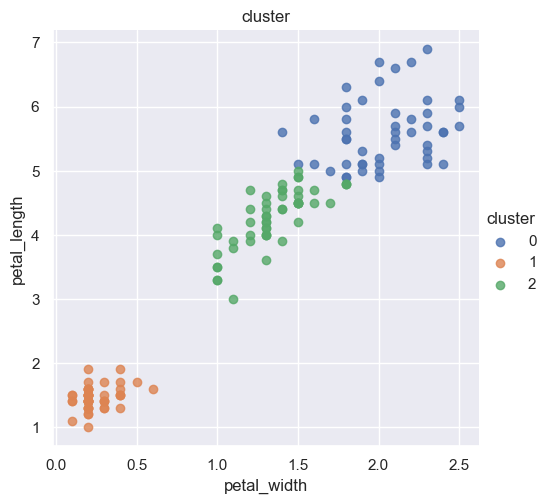

In [ ]:
#クラスタリングの結果と、アヤメの品種を比較
# グラフ化用DataFrameを作成して、tempに格納
temp = dataset[['petal_width', 'petal_length', 'species']].copy()
temp['cluster'] = kmeans_model.labels_

# k-means法によるクラスタリングの結果を描画
ax = sns.lmplot(x='petal_width', y='petal_length', data=temp, hue='cluster', fit_reg=False)
ax.set(title='cluster')

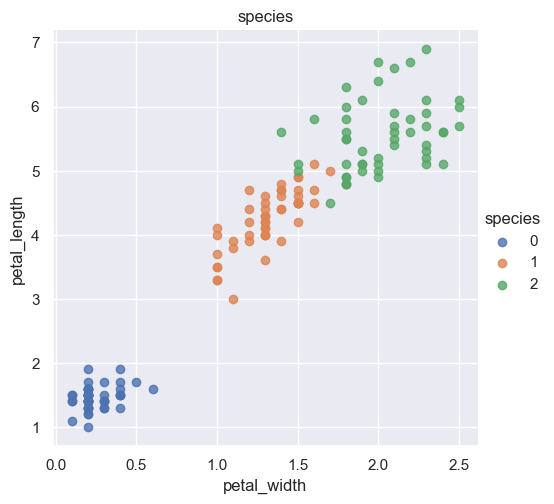

In [12]:
# アヤメの品種（正解）を描画
ax = sns.lmplot(x='petal_width', y='petal_length', data=temp, hue='species', fit_reg=False)
ax.set(title='species')

クラスタリングの評価
クラスタリングの評価基準には 凝集性（ぎょうしゅうせい、cohesion） と 分離性（ぶんりせい、separation） があります。

凝集性：各グループ内でデータの距離が近いこと。前述した WCSS（シードとデータとの距離の総和）が小さいことを意味します
分離性：各クラスター同士が離れていること

凝集性（エルボーメソッドのグラフ）
はじめは 凝集性 に着目します。クラスタ数を変えながらWCSSをグラフで確認し、適切なクラスタ数を評価してみましょう。
モデルの inertia_ プロパティにWCSSが格納されています

In [13]:
# 各クラスタごとのWCSSを格納するリスト
wcss = []

# クラスタ数のリスト（1から9)
c_list = np.arange(1, 10)

for c in c_list:
    # クラスタ数を c で指定
    kmeans_model = KMeans(n_clusters=c, init='k-means++', n_init=10)
    kmeans_model.fit(X)
    # inertia_プロパティに、WCSSが格納されている
    wcss.append(kmeans_model.inertia_)

In [ ]:
#学習が終わったら結果を表示
# WCSSの表示
wcss

[550.8953333333333,
 86.39021984551397,
 31.371358974358973,
 19.49030086946703,
 13.91690875790876,
 11.084575219743067,
 9.215301022648848,
 7.681931157817818,
 6.480259206692711]

<Axes: >

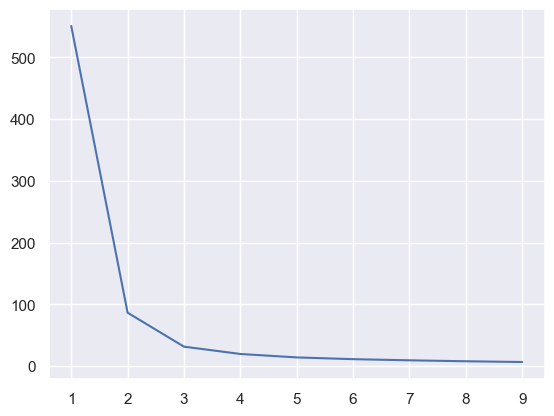

In [15]:
# グラフ化
sns.lineplot(x=c_list, y=wcss)

このグラフは肘のように見えることから エルボーメソッド (Elbow method)と呼ばれます。

クラスタ数1～2：WCSSが大きい状態。十分にクラスタリングができていないことを示しています
クラスタ数が5以上：クラスタ数を増やしても、WCSSの減少幅が小さくなります。このあたりから、クラスタ数を増やすことによる改善効果が薄れていると考えられます
よって、WCSSがこれ以上大きく下がらないクラスタ数3か4が「最適なクラスタ数」と読み取ることができます。

In [ ]:
凝集性と分離性（シルエットプロットのグラフ）
凝集性と分離性の両方に着目したのが シルエットプロット です。シルエットプロットは シルエットスコア をグラフにしたものです。シルエットスコアは、クラスタに属するデータとシードとの距離を -1～1 の値の範囲で表したものです。1 に近いほど、自クラスタのシードに近く、-1 に近いほど、他のクラスタのシードに近い（自クラスタのシードからは遠い）と言えます。

シルエットスコアを計算するには scikit-learn の silhouette_score と silhouette_samples を使います。

In [16]:
# 必要なライブラリの追加import
from sklearn.metrics import silhouette_score, silhouette_samples

In [17]:
# クラスタ数の指定
cluster_no = 3

# クラスタリング
kmeans_model = KMeans(n_clusters=cluster_no, init='k-means++', n_init=10)
Y_pred = kmeans_model.fit_predict(X)

In [18]:
#シルエットスコアを計算
# シルエットスコアの平均値
s_average = silhouette_score(X, Y_pred)

# 各データのシルエットスコア
s_score = silhouette_samples(X, Y_pred, metric='euclidean')

In [ ]:
# シルエットプロットを描画
# 参考： https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)
y_lower = 0

for i in range(cluster_no):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = s_score[Y_pred == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    #color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the space between silhouette plots

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=s_average, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])